# B - 1 - Labels Analysis

## Introduction
**Labels** represent the categories or classes we are aiming at automatically assign, in our case, the subjects of documents. Some label space characteristics are likely to create challenges during the training process, and influence the accuracy of the outcome. The **label space** is the set of all labels used used to categorize the records/documents in a specific dataset.

* label space dimension: a large label space is challenging as it requires more computational capacity. This is particularly true when the feature space is also highly dimmensional.
* labels skewness: some labels are often represented in the dataset while others appear rearely.


**Labels distribution** represent the number of label assigned to each record/document. Label distribution can varied in the dataset. This will be important when deciding how many labels assigning autimatically, and defining a threshold.

**Binary matrix**: A binary matrix is often used to represent the association of each record with each label in the dataset. One dimension represent records (i.e. rows) the other dimension the labels (i.e. columns).:
* 1 indicates that the label is assigned to the record
* 0 indicates that the label is not assigned to the record

For instance in the following example, record 32 is labelled with ABKHAZIA (GEORGIA) and AERIAL BOMBINGS.

| record_id  | ABDUCTION  |  ABKHAZIA (GEORGIA) | ABU MUSA | ABYEI (SUDAN) | ADMINISTRATIVE PROCEDURE | AERIAL BOMBINGS |
|---|---|---|---|---|---|---|
|32|0|1|0|0|0|1|

## Processes description

**Process aim:**
Analyzing the label space (dimension and skewness) as well as the distribution of labels by documents. Creating and reducing the label space and the labelset to avoid computational issues due to their high dimension.

**Input:** A dataset in CSV
**Sub-processes**:
1. Import the dataset
2. Labes distribution
    * visualization
    * statistical reports
2. Analyze the label space
    * Create a binary matrix of labels
    * Create label use reports
    * Reduce the label space based on reports finding
    * Reduce the dataset

**Output:** 
* Statistical reports in Excel
* Dataset in csv
* Labelset in csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import

In [19]:
# Import the dataset 
dataset = pd.read_csv('../data/B_engineering/doc_2000_2017.csv', index_col='record_id')
dataset = pd.read_csv('../data/B_engineering/sc_2000_2017.csv', index_col='record_id')

In [7]:
dataset.head(2)

,Unnamed: 0,year,geo,topics,symbol,title,url_English,text,main_body,topics_geo,geo_count,topics_count,topics_geo_count
record_id,,,,,,,,,,,,,
455823,0,2001,NaN,NON-ALIGNED COUNTRIES||INTERNATIONAL SECURITY|...,A/56/682||S/2001/1159,Letter dated 2001/12/06 from the Permanent Rep...,http://digitallibrary.un.org/record/455823/fil...,A/56/682–S/2001/1159 United Nations General As...,"A,S",NON-ALIGNED COUNTRIES||INTERNATIONAL SECURITY|...,0,6,6
420454,5,2000,NaN,DEVELOPMENT||INTERNATIONAL TRADE||GENETIC ENGI...,A/55/257||S/2000/766,Letter dated 2000/08/01 from the Chargé d'affa...,http://digitallibrary.un.org/record/420454/fil...,A/55/257–S/2000/766 United Nations General Ass...,"A,S",DEVELOPMENT||INTERNATIONAL TRADE||GENETIC ENGI...,0,11,11


## Labels Distribution
Three fields are representing labels:
* topics represent topcial terms
* geo represents geographic terms
* topics_geo is a concatenation of topcis and geo

During the previous steps we create three fields to record how many labels of each type are assigned to each document:
* topics_count
* geo_count
* topics_geo_counts

We will use these counts field to plot the distribution and output statistics:
### Plot
A quick plot gives us primary information on the distribution of labels in records.

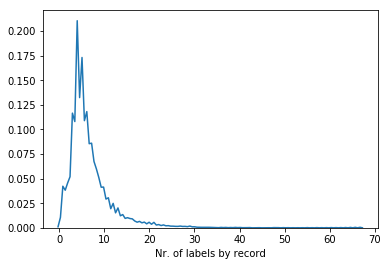

In [8]:
# Example for topics_geo
sns.distplot(dataset['topics_geo_count'], hist=False, axlabel='Nr. of labels by record')

### Statistics
While a graphic representation of the distribution, gives a quick way to visualize the distribution of labels (i.e. how many labels the majority of records are assigned, etc.), statistics provide more details. We will output a report with the following indicators:
* number of documents
* minimum (min) and maximum (max)
* average (mean)
* standard deviation (std)
* median (50%)
* 25% percentiles (25%)
* 75% percentiles (75%)

We will break these number by year. This report will provide information on:
* label distribution in the dataset
* consistency of manual indexing practices over time

In [9]:
def statistics(dataset, field, group_by=None):
    '''
    Takes a dataset, the name of the field, to analyze, and the name of the field use to group if applicable.
    For computes statistics for the field, breaking it down by year.
    Returns a dataframe with the values.
    '''
    if group_by is not None:
        statistics = dataset.groupby('year')[field].describe()
        statistics.loc['all records'] = dataset[field].describe()
    if group_by is None:
        statistics = dataset[field].describe()
    return statistics

def reduce_dataset(dataset, field, reduce_value=0):
    '''
    Takes a dataset, a field and a value.
    Reduce the dataset to keep only records, when the field is greater than the given value.
    Returns the reduced dataset.
    '''
    return dataset[dataset[field] > reduce_value]

def reports_by_field(dataset, fields, group_by=None, reduce_value=0):
    '''
    Takes a dataset and a list of fields. For each field in the list, called a function that outputs basic statistics.
    Returns a dictionary that includes various reports stored as dataframe.
    '''
    reports = {}
    for field in fields:
        # reduce the dataset to keep only the records that have a label assigned to it.
        dataset = reduce_dataset(dataset, field, reduce_value)
        # Get statistics for the designated field, and store it in reports dictionary
        reports[field] = statistics(dataset, field, group_by)
    return reports

def save_reports(reports, name):
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter('reports/' + name + '.xlsx', engine='xlsxwriter')
    # Write each dataframe to a different worksheet.
    for k,v in reports.items():
        v.to_excel(writer, sheet_name=k)
    writer.save()

In [10]:
labels_fields = ['topics', 'geo', 'topics_geo']
labels_count_fields = ['topics_count', 'geo_count', 'topics_geo_count']
labels_distribution = reports_by_field(dataset, labels_count_fields, group_by='year')

In [18]:
labels_distribution.keys()

dict_keys(['topics_count', 'geo_count', 'topics_geo_count'])

In [11]:
# To visualize the report for a specific field. We will focus mainly on the concatenate columns.
labels_distribution['topics_geo_count']

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,1543.0,6.124433,2.820633,2.0,4.0,6.0,7.0,29.0
2001,1510.0,6.470199,3.059403,2.0,4.0,6.0,7.0,24.0
2002,1779.0,7.588533,4.144250,2.0,4.0,7.0,9.0,34.0
2003,1530.0,8.577124,5.316005,2.0,5.0,8.0,10.0,42.0
2004,1441.0,9.109646,5.867559,2.0,5.0,8.0,11.0,50.0
2005,1293.0,8.969838,6.457040,2.0,5.0,7.0,11.0,47.0
2006,1432.0,9.182961,5.752407,2.0,5.0,8.0,11.0,51.0
2007,1200.0,8.545000,6.309079,2.0,5.0,7.0,9.0,57.0
2008,1153.0,8.615785,5.802507,2.0,5.0,7.0,10.0,48.0


### Analysis
It is important to observe:
* difference between maximum and minimum number of subjects assigned by records
* difference between mean and median (50%): provides indication on the influence of outliers values.
* 75 percentiles gives us information on where the number for the majority of records:
    * 75% of the records have x documents assigned or less.

## Labels Frequency
The previour report gave some usefull information on the distribution of labels in the dataset. The next step is to focus on the labels by looking at **label frequency**. In other words, how many times is are labels assigned to a record in the dataset. Important difference between less used labeled and the most used label indicates **label imbalance**.  

### Binary matrix

To facilitate the computation of some statistics, we will start by creating a binary representation of the association between labels and records. Depending on the output of the statistics, the dimensions of the matrix will be reduced. For the following steps we will focus only on the concatenated fields (geo_topics).

In [12]:
def get_binary_labels(dataset,field,separator='||'):
    '''
    Takes a pandas dataset, the name of the column containing labels, and separator (i.e. multivalue):
    - reduce the dataset to keep only the records with a valid value.
    - transform the column representing the label to a list
    - split it to a list of labels for each row
    - transform the list of textual labels to a binary matrix
    - join the year to the binary labels and create a dataframe with two levels of index (record_id, year)
    - invert the matrix to have labels in rows and record_id in columns.
    - return the binary matrix as a DataFrame
    '''
    dataset = reduce_dataset(dataset, field + '_count')
    dataset.reset_index(inplace=True)
    labels = dataset[field].tolist()
    labels = [l.split(separator) for l in labels]
    mlb = MultiLabelBinarizer()
    binary_labels = mlb.fit_transform(labels)
    labels = mlb.classes_
    labelset = (pd.DataFrame(binary_labels, columns=labels)
                .join(dataset[['record_id','year']])
                .set_index(['year','record_id'])
                .sort_index()
                .T
               )
    return labelset

In [13]:
# Create the binary representation
binary_labels = get_binary_labels(dataset,'topics_geo')

In the resulting binary mattrix:
Rows represent subject terms and columns a record in the dataset.
* 0 indicates that the term was not used to index the document referenced in the column
* 1 indicates that the term was used to index the document referenced in the column

In [14]:
binary_labels.head(3)

year                       2000                                          \
record_id               404925  405224  405225  405226  405227  405295    
ABDUCTION                     0       0       0       0       0       0   
ABIDJAN (COTE D'IVOIRE)       0       0       0       0       0       0   
ABKHAZIA (GEORGIA)            0       0       0       0       0       0   

year                                                      ...      2017  \
record_id               405297  405397  405411  405414    ...   1324178   
ABDUCTION                     0       0       0       0   ...         0   
ABIDJAN (COTE D'IVOIRE)       0       0       0       0   ...         0   
ABKHAZIA (GEORGIA)            0       0       0       0   ...         0   

year                                                                     \
record_id               1324431 1324715 1324716 1324761 1324762 1325027   
ABDUCTION                     0       0       0       0       0       0   
ABIDJAN (COTE D'IVOIRE)       0       0       0       0       0       0   
ABKHAZIA (GEORGIA)            0       0       0       0       0       0   

year                                             
record_id               1325822 1325827 1325834  
ABDUCTION                     0       0       0  
ABIDJAN (COTE D'IVOIRE)       0       0       0  
ABKHAZIA (GEORGIA)            0       0       0  

[3 rows x 26103 columns]

### Label Frequency

In [16]:
def label_count(dataset, periods):
    count_reports = pd.DataFrame()
    count_reports['all_years'] = dataset.sum(axis = 1)
    for period in periods:
        subset = dataset[period]
        count = subset.sum(axis=1)
        count_reports[period] = count
    return count_reports

def label_statistics_reports(dataset, periods ,cumul=False):
    total = len(dataset)
    statistics_reports = pd.DataFrame()
    for period in periods:
        subset = dataset[period]
        if cumul is True:
            subset = subset.sum(axis = 1)
            subset = subset[subset > 0]
            period = str(period[0]) + '-' + str(period[-1])
        elif cumul is False:
            subset = subset[subset > 0]
        statistics = subset.describe()
        statistics.loc['size (%labelset)'] = len(subset) * 100 / total
        statistics_reports[period] = statistics
    return statistics_reports

def create_label_reports(labelset):
    years = labelset.columns.levels[0].tolist()
    periods = get_periods(years)
    count = label_count(labelset, years)
    reports = {
        'count': count,
        'statistics_yearly': label_statistics_reports(count ,years),
        'statistics_cumul': label_statistics_reports(count, periods, cumul=True)
    }
    return reports

def get_periods(years):
    periods = []
    i = 1
    for year in range(1, len(years) +1):
        periods.append(years[:i])
        i += 1
    return periods

In [128]:
topics_reports = create_label_reports(topics_labelset)
topics_geo_reports = create_label_reports(topics_geo_labelset)
geo_reports = create_label_reports(geo_labelset)
primary_reports = create_label_reports(primary_labelset)
primary_geo_reports = create_label_reports(primary_geo_labelset)

**Report output**
The first report is called 'count'. For each year, it provides how many time each label was used.

The second and third reports 'statistics yearly' and statistics cumul provide the same information. Statistics cumul cumul the years while statistics yearly condiser each year independently. The following indicators are output:
* count: number of labels
* mean: average number of time a label is used
* std: standard deviation
* min / max : minimum/maximum number of times labels are used.
* 25% of labels have been used x times or less
* 50% of labels have been used x times or less (median)
* 75% of labels have been used x times or less
* size (%labelset): proportion of labels used for a particular year

In [180]:
def reduce_labelset(labelset, by):
    labelset['count'] = labelset.sum(axis=1)
    labelset = labelset[labelset['count']>by]
    ls_length = len(labelset)
    labelset = labelset.drop('count', axis=1).T
    labelset = labelset.reset_index(level=0).drop('year', axis=1)
    labelset['count'] = labelset.sum(axis=1)
    labelset = labelset[labelset['count']>0]
    ds_length = len(labelset)
    return labelset,ls_length, ds_length

def labelset_size(labelset,labels_report):
    labelset['count'] = labelset.sum(axis=1)
    ls_size = len(labelset)
    ds_size = len(labelset.columns)
    mean = labels_report['statistics_cumul'].loc['mean']['2000-2017']
    median = labels_report['statistics_cumul'].loc['50%']['2000-2017']
    pc_75 = labels_report['statistics_cumul'].loc['75%']['2000-2017']
    ls, ls_mean, ds_mean = reduce_labelset(labelset, mean)
    ls, ls_median, ds_median = reduce_labelset(labelset, median)
    ls, ls_75, ds_75 = reduce_labelset(labelset, mean)
    report = {
        '1. Dataset size': ds_size,
        '2. Labelset size': ls_size,
        '3. Nb of documents by labelse - mean': mean,
        '4. Nb of documents by labelse - median': median,
        '5. Nb of documents by labelse - 75%': pc_75,
        '6. Labelset size reduced by mean': ls_mean,
        '7. Labelset size reduced by median': ls_median,
        '8. Labelset size reduced by 75%': ls_75,
        '9. Dataset size reduced by mean': ds_mean,
        '10. Dataset size reduced by median': ds_median,
        '11. Dataset size reduced by 75%': ds_75,
    }
    return report

In [174]:
labelsets = [geo_labelset, topics_labelset, primary_labelset, topics_geo_labelset, primary_geo_labelset]
labels_report = [geo_reports, topics_reports, primary_reports, topics_geo_reports, primary_geo_reports]
labels = ['geo', 'topics', 'primary', 'topics_geo', 'primary_geo']

In [175]:
size_report = {}
for i in range(0, len(labels)):
    size_report[labels[i]] = labelset_size(labelsets[i], reports[i])

In [177]:
pd.DataFrame(size_report)

,geo,primary,primary_geo,topics,topics_geo
75%,165.250000,27.000000,37.000000,47.000000,55.000000
ds_size-75%,54623.000000,53557.000000,54712.000000,53744.000000,54714.000000
ds_size-mean,54605.000000,53452.000000,54707.000000,53726.000000,54703.000000
ds_size-median,54705.000000,53714.000000,54719.000000,53789.000000,54719.000000
ls size,604.000000,3007.000000,3610.000000,3803.000000,4406.000000
ls_size-75%,362.000000,1204.000000,1426.000000,1845.000000,1915.000000
ls_size-mean,356.000000,994.000000,1217.000000,1649.000000,1657.000000
ls_size-median,470.000000,2415.000000,2924.000000,3220.000000,3363.000000
mean,168.879139,60.279016,78.465928,91.361294,102.008625
median,31.000000,6.000000,7.000000,10.000000,12.000000


In [140]:
test

{'75%': 10.0,
 'mean': 91.361293715487776,
 'median': 10.0,
 'reduced-75%': 2456,
 'size': 3803.0,
 'size-mean': 973,
 'size-median': 2456}

In [ ]:
# What % of the labelset will we keep if we retain only the labels if their count is in the 75th percentiles 
len(subjects_all_labelset[subjects_all_labelset['count']>=p_75]) * 100 / len(subjects_all_labelset)

In [ ]:
reduced_labelset = subjects_all_labelset[subjects_all_labelset['count']>=p_75]
reduced_labelset = reduced_labelset.drop('count', axis=1)

In [ ]:
reduced_labelset = reduced_labelset.T

In [ ]:
reduced_labelset = reduced_labelset.reset_index(level=0)

In [ ]:
reduced_labelset = reduced_labelset.drop('year', axis=1)

In [ ]:
reduced_labelset['count'] = reduced_labelset.sum(axis=1)

In [ ]:
len(reduced_labelset)

In [ ]:
len(reduced_labelset[reduced_labelset['count']>0])

In [ ]:
reduced_labelset = reduced_labelset[reduced_labelset['count']>0]

In [ ]:
#reduced_labelset.drop('count',inplace=True,axis=1)
reduced_labelset.to_csv('data/B_input_space/sc_labelspace.csv')

In [ ]:
len(reduced_dataset)

In [ ]:
reduced_dataset = reduced_dataset.join(reduced_labelset, how='right')
len(reduced_dataset)

In [ ]:
reduced_dataset = reduced_dataset.drop(['body', 'year', 'session', 'subjects_geo', 'subjects_primary','subjects_topics', 'symbol', 'type', 'main_body', 'subjects_all', 'subjects_all_count'], axis=1)

In [ ]:
reduced_dataset.to_csv('data/B_input_space/sc_dataset.csv')

In [ ]:
#all_years.plot(kind='hist', bins=bin_values)

In [134]:
save_reports(topics_reports,'all_bodies_topics')
save_reports(geo_reports,'all_bodies_geo')
save_reports(topics_geo_reports,'all_bodies_topics_geo')
save_reports(primary_reports,'all_bodies_primary')
save_reports(primary_geo_reports,'all_bodies_primary_geo')